In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading the data
data=pd.read_csv('iv_health.csv')
pd.set_option('display.max_columns',None)
data.head()

,medexpense,healthinsu,age,female,blackhisp,income,illnesses,ssiratio,lowincome,firmsize,firmlocation,educyr,private,hisp,marry,vegood,good,fair,poor,poverty,midincome,msa,priolist,black,logmedexpense,age2,logincome,vgh,fph
0,595,1,74,1,0,94.54589,0,0.149876,0,0.0,0,16,1,0,1,0,1,0,0,0,0,0,1,0,6.388561,5476,4.549085,1,0
1,1783,1,73,0,0,35.79638,3,0.395856,0,0.1,0,8,1,0,1,0,1,0,0,0,0,0,1,0,7.486053,5329,3.577847,1,0
2,176,0,80,1,0,9.60000,1,1.000000,0,0.0,0,12,0,0,0,0,0,0,0,1,0,1,1,0,5.170484,6400,2.261763,0,0
3,2437,1,70,0,0,38.71477,5,0.206640,0,0.0,0,17,1,0,1,0,1,0,0,0,0,1,1,0,7.798523,4900,3.656221,1,0
4,330,0,91,0,0,8.72500,3,0.537192,0,0.0,0,16,0,0,1,1,0,0,0,0,1,1,1,0,5.799093,8281,2.166193,1,0


In [3]:
#checking if there are any null values
data.isnull().sum()

medexpense       0
healthinsu       0
age              0
female           0
blackhisp        0
income           0
illnesses        0
ssiratio         0
lowincome        0
firmsize         0
firmlocation     0
educyr           0
private          0
hisp             0
marry            0
vegood           0
good             0
fair             0
poor             0
poverty          0
midincome        0
msa              0
priolist         0
black            0
logmedexpense    0
age2             0
logincome        0
vgh              0
fph              0
dtype: int64

In [4]:
columns=list(data.columns)

In [5]:
for i in columns:
    print(i)
    print(data[i].value_counts())
    print('*******************************************')

medexpense
7       24
37      17
12      17
64      16
65      16
        ..
5763     1
3015     1
2632     1
1719     1
8198     1
Name: medexpense, Length: 3386, dtype: int64
*******************************************
healthinsu
0    6233
1    3856
Name: healthinsu, dtype: int64
*******************************************
age
70    716
85    657
71    592
72    581
73    539
69    529
65    496
80    493
74    488
67    466
66    464
68    427
75    418
79    407
76    406
81    395
77    368
78    333
82    272
83    268
90    264
84    241
86     83
87     57
89     46
91     45
88     38
Name: age, dtype: int64
*******************************************
female
1    5822
0    4267
Name: female, dtype: int64
*******************************************
blackhisp
0    8439
1    1650
Name: blackhisp, dtype: int64
*******************************************
income
7.5000     76
6.0000     65
12.0000    60
10.0000    59
9.0000     57
           ..
1.3870      1
1.2350      1
41.1061   

# Linear Regression

Let's suppose that our target variable is medexpense

In [6]:
X=data.drop('medexpense',axis=1)
Y=data['medexpense']

In [7]:
columns_to_encode= []
for i in X.columns:
    if data[i].nunique() <20:
        columns_to_encode.append(i)
        
columns_to_encode

['healthinsu',
 'female',
 'blackhisp',
 'illnesses',
 'lowincome',
 'firmlocation',
 'educyr',
 'private',
 'hisp',
 'marry',
 'vegood',
 'good',
 'fair',
 'poor',
 'poverty',
 'midincome',
 'msa',
 'priolist',
 'black',
 'vgh',
 'fph']

In [8]:
data_encoded=pd.get_dummies(X,columns=columns_to_encode,drop_first=True)
X=data_encoded
X

,age,income,ssiratio,firmsize,logmedexpense,age2,logincome,healthinsu_1,female_1,blackhisp_1,illnesses_1,illnesses_2,illnesses_3,illnesses_4,illnesses_5,illnesses_6,illnesses_7,illnesses_8,illnesses_9,lowincome_1,firmlocation_1,educyr_1,educyr_2,educyr_3,educyr_4,educyr_5,educyr_6,educyr_7,educyr_8,educyr_9,educyr_10,educyr_11,educyr_12,educyr_13,educyr_14,educyr_15,educyr_16,educyr_17,private_1,hisp_1,marry_1,vegood_1,good_1,fair_1,poor_1,poverty_1,midincome_1,msa_1,priolist_1,black_1,vgh_1,fph_1
0,74,94.54589,0.149876,0.0,6.388561,5476,4.549085,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0
1,73,35.79638,0.395856,0.1,7.486053,5329,3.577847,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0
2,80,9.60000,1.000000,0.0,5.170484,6400,2.261763,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
3,70,38.71477,0.206640,0.0,7.798523,4900,3.656221,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0
4,91,8.72500,0.537192,0.0,5.799093,8281,2.166193,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10084,83,4.95000,1.000000,0.0,7.645876,6889,1.599388,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0
10085,72,13.54500,0.974529,0.0,9.149103,5184,2.606018,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
10086,80,11.46300,0.837477,0.0,9.011645,6400,2.439125,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1
10087,67,8.50000,1.000000,0.0,7.134094,4489,2.140066,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0


In [9]:
X_features=X.columns
X_features

Index(['age', 'income', 'ssiratio', 'firmsize', 'logmedexpense', 'age2',
       'logincome', 'healthinsu_1', 'female_1', 'blackhisp_1', 'illnesses_1',
       'illnesses_2', 'illnesses_3', 'illnesses_4', 'illnesses_5',
       'illnesses_6', 'illnesses_7', 'illnesses_8', 'illnesses_9',
       'lowincome_1', 'firmlocation_1', 'educyr_1', 'educyr_2', 'educyr_3',
       'educyr_4', 'educyr_5', 'educyr_6', 'educyr_7', 'educyr_8', 'educyr_9',
       'educyr_10', 'educyr_11', 'educyr_12', 'educyr_13', 'educyr_14',
       'educyr_15', 'educyr_16', 'educyr_17', 'private_1', 'hisp_1', 'marry_1',
       'vegood_1', 'good_1', 'fair_1', 'poor_1', 'poverty_1', 'midincome_1',
       'msa_1', 'priolist_1', 'black_1', 'vgh_1', 'fph_1'],
      dtype='object')

In [10]:
import statsmodels.api as sm
X=sm.add_constant(X)
X.head()

,const,age,income,ssiratio,firmsize,logmedexpense,age2,logincome,healthinsu_1,female_1,blackhisp_1,illnesses_1,illnesses_2,illnesses_3,illnesses_4,illnesses_5,illnesses_6,illnesses_7,illnesses_8,illnesses_9,lowincome_1,firmlocation_1,educyr_1,educyr_2,educyr_3,educyr_4,educyr_5,educyr_6,educyr_7,educyr_8,educyr_9,educyr_10,educyr_11,educyr_12,educyr_13,educyr_14,educyr_15,educyr_16,educyr_17,private_1,hisp_1,marry_1,vegood_1,good_1,fair_1,poor_1,poverty_1,midincome_1,msa_1,priolist_1,black_1,vgh_1,fph_1
0,1.0,74,94.54589,0.149876,0.0,6.388561,5476,4.549085,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0
1,1.0,73,35.79638,0.395856,0.1,7.486053,5329,3.577847,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0
2,1.0,80,9.60000,1.000000,0.0,5.170484,6400,2.261763,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
3,1.0,70,38.71477,0.206640,0.0,7.798523,4900,3.656221,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0
4,1.0,91,8.72500,0.537192,0.0,5.799093,8281,2.166193,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=3)

In [12]:
model_1=sm.OLS(train_Y,train_X).fit()

In [13]:
model_1.params

const            -3842.324789
age                 12.148245
income               0.470429
ssiratio            68.793982
firmsize            -3.558883
logmedexpense      786.448016
age2                -0.116561
logincome          -44.008254
healthinsu_1        55.720328
female_1           -71.596254
blackhisp_1         79.805605
illnesses_1       -115.164529
illnesses_2       -124.816035
illnesses_3         36.401235
illnesses_4        264.315295
illnesses_5        766.920986
illnesses_6        735.514969
illnesses_7       1311.422161
illnesses_8       2440.126634
illnesses_9         22.168505
lowincome_1        -18.739508
firmlocation_1     -40.602487
educyr_1           142.199681
educyr_2           188.324382
educyr_3           122.772414
educyr_4           294.285981
educyr_5           329.455198
educyr_6           240.703453
educyr_7           248.363032
educyr_8           180.809086
educyr_9           230.391386
educyr_10          300.181825
educyr_11          218.362817
educyr_12 

In [14]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                OLS               Adj. R-squared:      0.564      
Dependent Variable:   medexpense        AIC:                 134492.7097
Date:                 2023-03-06 16:40  BIC:                 134856.5034
No. Observations:     8071              Log-Likelihood:      -67194.    
Df Model:             51                F-statistic:         205.3      
Df Residuals:         8019              Prob (F-statistic):  0.00       
R-squared:            0.566             Scale:               1.0039e+06 
------------------------------------------------------------------------
                 Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
------------------------------------------------------------------------
const          -3842.3248 1441.2139 -2.6660 0.0077 -6667.4785 -1017.1711
age               12.1482   37.5930  0.3232 0.7466   -61.5438    85.8403
income             0.4704    0.8813  0.5338 0.5935    -1.2571     2.1980
ssiratio          68.7940   36.5569  1.8818 0.0599    -2.8671   140.4551
firmsize          -3.5589    5.2369 -0.6796 0.4968   -13.8246     6.7069
logmedexpense    786.4480    9.1415 86.0308 0.0000   768.5283   804.3677
age2              -0.1166    0.2457 -0.4744 0.6352    -0.5982     0.3651
logincome        -44.0083   22.8917 -1.9225 0.0546   -88.8819     0.8654
healthinsu_1      55.7203   30.0235  1.8559 0.0635    -3.1335   114.5742
female_1         -71.5963   24.4207 -2.9318 0.0034  -119.4672   -23.7253
blackhisp_1       79.8056  227.6383  0.3506 0.7259  -366.4247   526.0359
illnesses_1     -115.1645   39.5955 -2.9085 0.0036  -192.7821   -37.5470
illnesses_2     -124.8160   42.0522 -2.9681 0.0030  -207.2493   -42.3828
illnesses_3       36.4012   46.9243  0.7757 0.4379   -55.5825   128.3850
illnesses_4      264.3153   56.9865  4.6382 0.0000   152.6069   376.0237
illnesses_5      766.9210   82.5053  9.2954 0.0000   605.1891   928.6529
illnesses_6      735.5150  145.9485  5.0396 0.0000   449.4179  1021.6120
illnesses_7     1311.4222  337.6477  3.8840 0.0001   649.5450  1973.2993
illnesses_8     2440.1266 1010.2087  2.4155 0.0157   459.8550  4420.3983
illnesses_9       22.1685 1005.5301  0.0220 0.9824 -1948.9318  1993.2689
lowincome_1      -18.7395   42.0137 -0.4460 0.6556  -101.0973    63.6182
firmlocation_1   -40.6025   49.2031 -0.8252 0.4093  -137.0533    55.8484
educyr_1         142.1997  292.6016  0.4860 0.6270  -431.3754   715.7748
educyr_2         188.3244  259.3680  0.7261 0.4678  -320.1043   696.7531
educyr_3         122.7724  217.5161  0.5644 0.5725  -303.6156   549.1605
educyr_4         294.2860  213.6799  1.3772 0.1685  -124.5822   713.1542
educyr_5         329.4552  215.4572  1.5291 0.1263   -92.8969   751.8073
educyr_6         240.7035  195.1835  1.2332 0.2175  -141.9068   623.3138
educyr_7         248.3630  197.2858  1.2589 0.2081  -138.3684   635.0944
educyr_8         180.8091  186.8575  0.9676 0.3333  -185.4802   547.0984
educyr_9         230.3914  190.9126  1.2068 0.2275  -143.8469   604.6297
educyr_10        300.1818  188.7227  1.5906 0.1117   -69.7637   670.1273
educyr_11        218.3628  189.4992  1.1523 0.2492  -153.1048   589.8305
educyr_12        228.3412  184.5870  1.2370 0.2161  -133.4973   590.1796
educyr_13        381.2466  190.2032  2.0044 0.0451     8.3988   754.0944
educyr_14        246.6356  187.8972  1.3126 0.1894  -121.6918   614.9630
educyr_15        278.2166  195.6103  1.4223 0.1550  -105.2304   661.6637
educyr_16        223.0049  188.1444  1.1853 0.2359  -145.8069   591.8168
educyr_17        226.3180  189.0273  1.1973 0.2312  -144.2245   596.8606
private_1        -37.2729   29.6815 -1.2558 0.2092   -95.4562    20.9105
hisp_1          -150.0656  222.2397 -0.6752 0.4995  -585.7131   285.5819
marry_1          -45.0901   26.3722 -1.7098 0.0873   -96.7864     6.6062
vegood_1         -72.9851   18

Model shows 56.4% variability of our target variable medexpense. There are quite a lot of insignificant features so we check multicollinearity.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def get_vif_factors( X ): 
 X_matrix = X.to_numpy() 
 vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ] 
 vif_factors = pd.DataFrame() 
 vif_factors['column'] = X.columns 
 vif_factors['vif'] = vif 
 return vif_factors 

In [16]:
vif_factors = get_vif_factors( X[X_features] ) 
vif_factors

,column,vif
0,age,1377.709662
1,income,5.994278
2,ssiratio,4.692972
3,firmsize,1.047482
4,logmedexpense,30.125390
5,age2,457.617459
6,logincome,34.494643
7,healthinsu_1,2.766023
8,female_1,2.754434
9,blackhisp_1,71.149368


In [17]:
columns_with_large_vif = vif_factors[vif_factors.vif>4].column 
columns_with_large_vif

0               age
1            income
2          ssiratio
4     logmedexpense
5              age2
6         logincome
9       blackhisp_1
11      illnesses_2
26         educyr_6
27         educyr_7
28         educyr_8
29         educyr_9
30        educyr_10
31        educyr_11
32        educyr_12
33        educyr_13
34        educyr_14
35        educyr_15
36        educyr_16
37        educyr_17
38        private_1
39           hisp_1
41         vegood_1
42           good_1
43           fair_1
44           poor_1
48       priolist_1
49          black_1
50            vgh_1
51            fph_1
Name: column, dtype: object

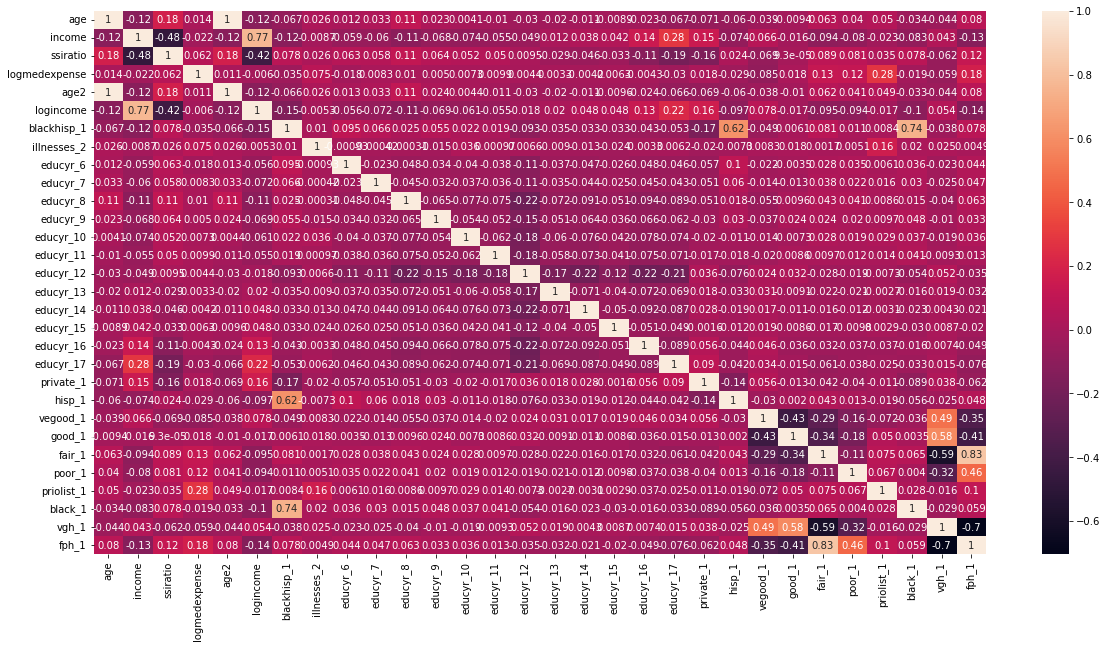

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(X[columns_with_large_vif].corr(),annot=True,fmt='.2g')
plt.show()

Since some pairs of variables are highly correlated so we remove one from each pair.

In [19]:
columns_to_remove=['logincome','blackhisp_1','fair_1','good_1']

In [20]:
X_new_features=list(set(X_features)-set(columns_to_remove))

In [21]:
vif_factors = get_vif_factors( X[X_new_features] ) 
vif_factors

,column,vif
0,illnesses_5,1.359894
1,illnesses_8,1.011809
2,educyr_16,20.943134
3,marry_1,3.009792
4,educyr_4,3.234712
5,educyr_8,20.377829
6,fph_1,3.305304
7,firmlocation_1,1.199848
8,educyr_9,10.956195
9,illnesses_6,1.100912


In [22]:
columns_with_large_vif = vif_factors[vif_factors.vif>4].column 
columns_with_large_vif

2         educyr_16
5          educyr_8
8          educyr_9
10      illnesses_2
13         educyr_6
14        educyr_13
16            vgh_1
17        educyr_10
19         ssiratio
20        educyr_11
23        educyr_12
26       priolist_1
28             age2
30    logmedexpense
31         educyr_7
34        educyr_14
35        private_1
36        educyr_15
39              age
41        educyr_17
Name: column, dtype: object

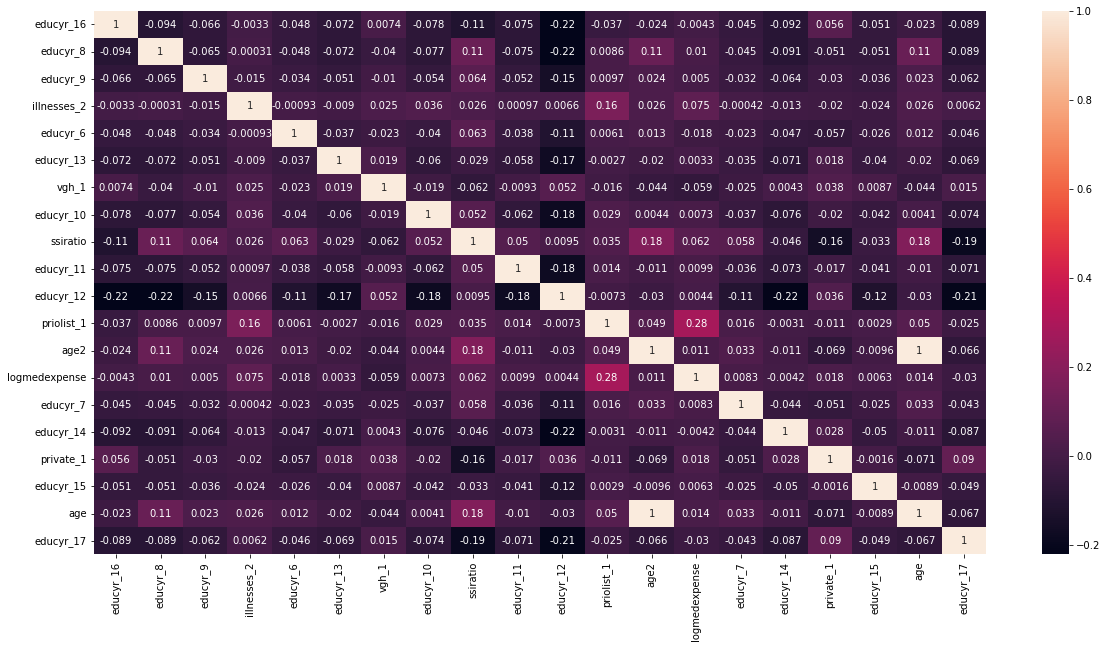

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(X[columns_with_large_vif].corr(),annot=True,fmt='.2g')
plt.show()

Again the variables age2 and age are highly correlated thus we remove age2

In [24]:
columns_to_remove=['age2']

In [25]:
X_new_features1=list(set(X_new_features)-set(columns_to_remove))

In [26]:
vif_factors = get_vif_factors( X[X_new_features1] ) 
vif_factors

,column,vif
0,illnesses_5,1.357438
1,illnesses_8,1.011773
2,educyr_16,10.425831
3,marry_1,2.851321
4,educyr_4,2.110997
5,educyr_8,10.390952
6,fph_1,3.296549
7,firmlocation_1,1.188480
8,educyr_9,5.751411
9,illnesses_6,1.100869


In [27]:
columns_with_large_vif = vif_factors[vif_factors.vif>4].column 
columns_with_large_vif

2         educyr_16
5          educyr_8
8          educyr_9
10      illnesses_2
14        educyr_13
16            vgh_1
17        educyr_10
19         ssiratio
20        educyr_11
23        educyr_12
26       priolist_1
29    logmedexpense
33        educyr_14
34        private_1
38              age
40        educyr_17
Name: column, dtype: object

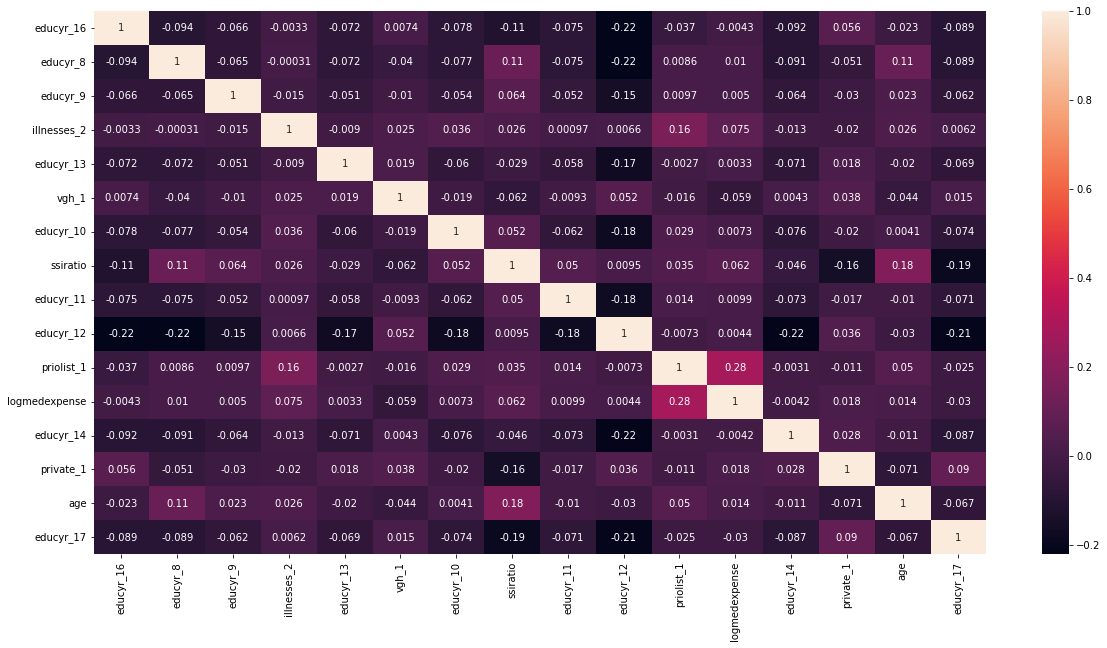

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(X[columns_with_large_vif].corr(),annot=True,fmt='.2g')
plt.show()

We see that multi collinearity is now removed

In [29]:
#training our model with the new set of variables
train_X=train_X[X_new_features1]
model_1=sm.OLS(train_Y,train_X).fit()

model_1.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.739      
Dependent Variable:     medexpense       AIC:                         134668.2733
Date:                   2023-03-06 16:41 BIC:                         134997.0869
No. Observations:       8071             Log-Likelihood:              -67287.    
Df Model:               47               F-statistic:                 486.1      
Df Residuals:           8024             Prob (F-statistic):          0.00       
R-squared (uncentered): 0.740            Scale:                       1.0266e+06 
----------------------------------------------------------------------------------
                     Coef.      Std.Err.     t      P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------
illnesses_5          811.2738    83.3503    9.7333  0.0000    647.8855    974.6621
illnesses_8         2582.3800  1021.4013    2.5283  0.0115    580.1682   4584.5917
educyr_16          -1659.7193   128.1402  -12.9524  0.0000  -1910.9074  -1408.5312
marry_1             -113.4670    25.4278   -4.4623  0.0000   -163.3122    -63.6219
educyr_4           -1530.8920   167.5664   -9.1360  0.0000  -1859.3656  -1202.4183
educyr_8           -1671.0566   128.6449  -12.9897  0.0000  -1923.2339  -1418.8793
fph_1                -39.7306    40.7481   -0.9750  0.3296   -119.6075     40.1463
firmlocation_1      -113.2377    49.3633   -2.2940  0.0218   -210.0025    -16.4729
educyr_9           -1635.8983   133.3716  -12.2657  0.0000  -1897.3413  -1374.4553
illnesses_6          748.2206   147.5352    5.0715  0.0000    459.0132   1037.4280
illnesses_2         -119.1655    42.5219   -2.8024  0.0051   -202.5195    -35.8115
msa_1                -64.4234    26.3340   -2.4464  0.0145   -116.0448    -12.8020
illnesses_3           56.3972    47.4263    1.1892  0.2344    -36.5707    149.3651
educyr_6           -1622.8419   140.0197  -11.5901  0.0000  -1897.3168  -1348.3669
educyr_13          -1500.6233   131.1763  -11.4397  0.0000  -1757.7629  -1243.4837
educyr_3           -1707.1448   172.2558   -9.9105  0.0000  -2044.8110  -1369.4786
vgh_1               -125.4228    35.5175   -3.5313  0.0004   -195.0463    -55.7993
educyr_10          -1576.3464   129.5085  -12.1718  0.0000  -1830.2166  -1322.4762
vegood_1             -65.1914    29.7533   -2.1911  0.0285   -123.5157     -6.8672
ssiratio              43.4986    36.9097    1.1785  0.2386    -28.8540    115.8513
educyr_11          -1659.4742   130.1962  -12.7460  0.0000  -1914.6926  -1404.2559
black_1              -28.9716    39.7050   -0.7297  0.4656   -106.8038     48.8605
healthinsu_1          39.6066    30.3135    1.3066  0.1914    -19.8157     99.0288
educyr_12          -1650.1119   122.9755  -13.4182  0.0000  -1891.1757  -1409.0480
illnesses_1         -128.1128    40.0223   -3.2010  0.0014   -206.5668    -49.6587
educyr_1           -1647.8718   264.0011   -6.2419  0.0000  -2165.3824  -1130.3611
priolist_1          -190.0212    38.1700   -4.9783  0.0000   -264.8444   -115.1981
lowincome_1          -44.8834    40.5759   -1.1062  0.2687   -124.4226     34.6559
female_1            -103.8831    24.5286   -4.2352  0.0000   -151.9655    -55.8007
logmedexpense        760.4819     9.0246   84.2676  0.0000    742.7913    778.1724
educyr_7           -1601.6904   143.7433  -11.1427  0.0000  -1883.4645  -1319.9163
poor_1               111.9556    51.7365    2.1640  0.0305     10.5385    213.3727
educyr_2           -1642.3604   223.8077   -7.3383  0.0000  -2081.0817  -1203.6392
educyr_14          -1637.3781   127.5417  -12.8380  0.0000  -1887.3930  -1387.3633
private_1            -45.4278    30.0009   -1.5142  0.1300   -104.2373     13.3817
educyr_15          -1601.7749   139.2671  -11.5015  0.0000  -1874.7747  -1328.7752
i

New model shows 73.9% variability of medexpense. Now i will remove the variables those are not statistically significant (p value>0.05)

In [30]:
columns_to_remove=['poverty_1','lowincome_1','healthinsu_1','private_1','illnesses_3','black_1','ssiratio',
                  'illnesses_9','firmsize','fph_1']

In [31]:
X_new_features2=list(set(X_new_features1)-set(columns_to_remove))

In [32]:
train_X=train_X[X_new_features2]
model_1=sm.OLS(train_Y,train_X).fit()

model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.739      
Dependent Variable:     medexpense       AIC:                         134657.9869
Date:                   2023-03-06 16:41 BIC:                         134916.8401
No. Observations:       8071             Log-Likelihood:              -67292.    
Df Model:               37               F-statistic:                 617.2      
Df Residuals:           8034             Prob (F-statistic):          0.00       
R-squared (uncentered): 0.740            Scale:                       1.0266e+06 
----------------------------------------------------------------------------------
                     Coef.      Std.Err.     t      P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------
illnesses_5          765.6608    76.0887   10.0627  0.0000    616.5073    914.8144
illnesses_8         2542.7518  1020.3758    2.4920  0.0127    542.5506   4542.9529
educyr_16          -1687.6257   126.3844  -13.3531  0.0000  -1935.3718  -1439.8796
marry_1             -106.5035    24.5842   -4.3322  0.0000   -154.6948    -58.3121
educyr_4           -1566.7132   165.5532   -9.4635  0.0000  -1891.2403  -1242.1860
educyr_8           -1704.6905   126.4058  -13.4859  0.0000  -1952.4785  -1456.9024
firmlocation_1      -123.4759    47.9790   -2.5735  0.0101   -217.5270    -29.4247
educyr_9           -1670.4554   131.0064  -12.7509  0.0000  -1927.2619  -1413.6490
illnesses_6          705.2395   143.6109    4.9108  0.0000    423.7249    986.7540
illnesses_2         -155.0088    30.2182   -5.1297  0.0000   -214.2443    -95.7734
msa_1                -60.4578    26.0848   -2.3177  0.0205   -111.5907     -9.3248
educyr_6           -1658.0617   137.8001  -12.0324  0.0000  -1928.1856  -1387.9377
educyr_13          -1528.7905   129.3403  -11.8199  0.0000  -1782.3310  -1275.2500
educyr_3           -1742.1867   170.1682  -10.2380  0.0000  -2075.7606  -1408.6128
vgh_1               -103.0013    27.5095   -3.7442  0.0002   -156.9270    -49.0756
educyr_10          -1607.5329   127.3541  -12.6225  0.0000  -1857.1800  -1357.8859
vegood_1             -67.4180    29.6567   -2.2733  0.0230   -125.5528     -9.2831
educyr_11          -1692.3064   127.9146  -13.2300  0.0000  -1943.0523  -1441.5606
educyr_12          -1678.4452   120.9626  -13.8757  0.0000  -1915.5632  -1441.3271
illnesses_1         -159.4399    29.4883   -5.4069  0.0000   -217.2446   -101.6353
educyr_1           -1675.1777   263.0926   -6.3673  0.0000  -2190.9073  -1159.4480
priolist_1          -175.5707    35.4432   -4.9536  0.0000   -245.0486   -106.0928
female_1            -104.4601    24.4781   -4.2675  0.0000   -152.4437    -56.4766
poor_1                99.3487    49.0286    2.0263  0.0428      3.2400    195.4574
logmedexpense        762.5150     8.6962   87.6837  0.0000    745.4682    779.5618
educyr_7           -1637.4779   141.5584  -11.5675  0.0000  -1914.9691  -1359.9868
educyr_2           -1675.9020   222.1983   -7.5424  0.0000  -2111.4683  -1240.3356
educyr_14          -1665.5600   125.7748  -13.2424  0.0000  -1912.1113  -1419.0088
educyr_15          -1628.5104   137.8111  -11.8170  0.0000  -1898.6560  -1358.3649
income                -1.4900     0.5754   -2.5896  0.0096     -2.6180     -0.3621
age                  -19.7006     1.4610  -13.4840  0.0000    -22.5646    -16.8366
illnesses_4          248.3533    47.5246    5.2258  0.0000    155.1928    341.5137
educyr_17          -1688.3570   127.0980  -13.2839  0.0000  -1937.5021  -1439.2119
midincome_1          -53.7489    24.4876   -2.1949  0.0282   -101.7509     -5.7469
illnesses_7         1341.6173   339.4408    3.9524  0.0001    676.2254   2007.0093
educyr_5           -1532.0342   167.4755   -9.1478  0.0000  -1860.3296  -1203.7388
h

all of the variables are statistically significant

In [33]:
pred_train_Y=model_1.predict(train_X[X_new_features2])
pred_test_Y=model_1.predict(test_X[X_new_features2])

In [34]:
from sklearn import  metrics

print('the r2 score for training dataset is',metrics.r2_score(train_Y,pred_train_Y))
print('RMSE for training dataset is ',np.sqrt(metrics.mean_squared_error(train_Y,pred_train_Y)))

print('**********************************************************************************************')

print('the r2 score for testing dataset is',metrics.r2_score(test_Y,pred_test_Y))
print('RMSE for testing dataset is ',np.sqrt(metrics.mean_squared_error(test_Y,pred_test_Y)))



the r2 score for training dataset is 0.5557010302074988
RMSE for training dataset is  1010.8686640867448
**********************************************************************************************
the r2 score for testing dataset is 0.5438874931129776
RMSE for testing dataset is  1069.33982491441


Thus the model doesnot overfit.

# 2SLS

In [35]:
!pip install linearmodels
from linearmodels.iv import IV2SLS


In [36]:
formula='logmedexpense~1+illnesses+age+logincome+[healthinsu~ssiratio]'
model_2=IV2SLS.from_formula(formula,data).fit(cov_type='unadjusted')


In [37]:
model_2.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:          logmedexpense   R-squared:                      0.0709
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0706
No. Observations:               10089   F-statistic:                    1910.3
Date:                Mon, Mar 06 2023   P-value (F-stat)                0.0000
Time:                        16:41:27   Distribution:                  chi2(4)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      6.5898     0.2346     28.088     0.0000      6.1300      7.0497
age           -0.0118     0.0028    -4.2312     0.0000     -0.0173     -0.0063
illnesses      0.4485     0.0103     43.586     0.0000      0.4283      0.4687
logincome      0.0977     0.0225     4.3499     0.0000      0.0537      0.1417
healthinsu    -0.8522     0.1983    -4.2967     0.0000     -1.2409     -0.4635
==============================================================================

Endogenous: healthinsu
Instruments: ssiratio
Unadjusted Covariance (Homoskedastic)
Debiased: False
"""

# Logistic Regression

Lets suppose our target variable is healthinsu now.

In [38]:
data_logistic=data.copy()

In [39]:
X=data_logistic.drop(['healthinsu'],axis=1)
Y=data_logistic['healthinsu']

In [40]:
X.head(2)

,medexpense,age,female,blackhisp,income,illnesses,ssiratio,lowincome,firmsize,firmlocation,educyr,private,hisp,marry,vegood,good,fair,poor,poverty,midincome,msa,priolist,black,logmedexpense,age2,logincome,vgh,fph
0,595,74,1,0,94.54589,0,0.149876,0,0.0,0,16,1,0,1,0,1,0,0,0,0,0,1,0,6.388561,5476,4.549085,1,0
1,1783,73,0,0,35.79638,3,0.395856,0,0.1,0,8,1,0,1,0,1,0,0,0,0,0,1,0,7.486053,5329,3.577847,1,0


In [41]:
Y.value_counts()

0    6233
1    3856
Name: healthinsu, dtype: int64

In [42]:
columns_to_encode= []
for i in X.columns:
    if data[i].nunique() <20:
        columns_to_encode.append(i)


In [43]:
data_logistic_encoded=pd.get_dummies(X,columns=columns_to_encode,drop_first=True)
X=data_logistic_encoded
X

,medexpense,age,income,ssiratio,firmsize,logmedexpense,age2,logincome,female_1,blackhisp_1,illnesses_1,illnesses_2,illnesses_3,illnesses_4,illnesses_5,illnesses_6,illnesses_7,illnesses_8,illnesses_9,lowincome_1,firmlocation_1,educyr_1,educyr_2,educyr_3,educyr_4,educyr_5,educyr_6,educyr_7,educyr_8,educyr_9,educyr_10,educyr_11,educyr_12,educyr_13,educyr_14,educyr_15,educyr_16,educyr_17,private_1,hisp_1,marry_1,vegood_1,good_1,fair_1,poor_1,poverty_1,midincome_1,msa_1,priolist_1,black_1,vgh_1,fph_1
0,595,74,94.54589,0.149876,0.0,6.388561,5476,4.549085,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0
1,1783,73,35.79638,0.395856,0.1,7.486053,5329,3.577847,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0
2,176,80,9.60000,1.000000,0.0,5.170484,6400,2.261763,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
3,2437,70,38.71477,0.206640,0.0,7.798523,4900,3.656221,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0
4,330,91,8.72500,0.537192,0.0,5.799093,8281,2.166193,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10084,2092,83,4.95000,1.000000,0.0,7.645876,6889,1.599388,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0
10085,9406,72,13.54500,0.974529,0.0,9.149103,5184,2.606018,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
10086,8198,80,11.46300,0.837477,0.0,9.011645,6400,2.439125,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1
10087,1254,67,8.50000,1.000000,0.0,7.134094,4489,2.140066,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0


In [44]:
cols=X.columns
cols

Index(['medexpense', 'age', 'income', 'ssiratio', 'firmsize', 'logmedexpense',
       'age2', 'logincome', 'female_1', 'blackhisp_1', 'illnesses_1',
       'illnesses_2', 'illnesses_3', 'illnesses_4', 'illnesses_5',
       'illnesses_6', 'illnesses_7', 'illnesses_8', 'illnesses_9',
       'lowincome_1', 'firmlocation_1', 'educyr_1', 'educyr_2', 'educyr_3',
       'educyr_4', 'educyr_5', 'educyr_6', 'educyr_7', 'educyr_8', 'educyr_9',
       'educyr_10', 'educyr_11', 'educyr_12', 'educyr_13', 'educyr_14',
       'educyr_15', 'educyr_16', 'educyr_17', 'private_1', 'hisp_1', 'marry_1',
       'vegood_1', 'good_1', 'fair_1', 'poor_1', 'poverty_1', 'midincome_1',
       'msa_1', 'priolist_1', 'black_1', 'vgh_1', 'fph_1'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [46]:
#feature scalling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [47]:
X_test

array([[0.05622962, 0.19230769, 0.06002388, ..., 1.        , 1.        ,
        0.        ],
       [0.09884735, 0.76923077, 0.17461491, ..., 0.        , 1.        ,
        0.        ],
       [0.01850307, 0.69230769, 0.07958484, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01205733, 0.34615385, 0.15523422, ..., 0.        , 1.        ,
        0.        ],
       [0.11860165, 0.15384615, 0.00207707, ..., 0.        , 1.        ,
        0.        ],
       [0.01008569, 0.61538462, 0.0266883 , ..., 0.        , 1.        ,
        0.        ]])

In [48]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model_3=LogisticRegression(random_state=0)
model_3.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [51]:
Y_pred_test=model_3.predict(X_test)

In [52]:
#prob of getting output as 0
model_3.predict_proba(X_test)[:,0]

array([0.23153158, 0.54559596, 0.53398023, ..., 0.1557135 , 0.30165784,
       0.45393002])

In [53]:
#prob of getting output as 1
model_3.predict_proba(X_test)[:,1]

array([0.76846842, 0.45440404, 0.46601977, ..., 0.8442865 , 0.69834216,
       0.54606998])

In [54]:
from sklearn import metrics

In [55]:
print('the accuracy of logistic regression is',metrics.accuracy_score(Y_test,Y_pred_test))

the accuracy of logistic regression is 0.7993062438057482


In [56]:
#print scores of training and test set
print('Training set score: {:.4f}'.format(model_3.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model_3.score(X_test, Y_test)))

Training set score: 0.7918
Test set score: 0.7993


The model is a good fit.